# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Nahdhiyah
- Email: dyahnahdya@gmail.com
- Id Dicoding: dyahnahdya

## Persiapan

### Menyiapkan library yang dibutuhkan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

import joblib

!pip install pandas sqlalchemy


### Menyiapkan data yang akan digunakan

In [2]:
# Membaca dataset dengan delimiter titik koma
df = pd.read_csv('/content/data.csv', sep=';')
print("Dataset berhasil dimuat. Berikut 5 baris pertama:")
display(df.head())

Dataset berhasil dimuat. Berikut 5 baris pertama:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [4]:
# Menampilkan dimensi dan informasi dasar dataset
rows, cols = df.shape
print(f"Jumlah baris: {rows}, Jumlah kolom: {cols}\n")

print("Struktur DataFrame:")
df.info(verbose=False)
df.info()

Jumlah baris: 4424, Jumlah kolom: 37

Struktur DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Columns: 37 entries, Marital_status to Status
dtypes: float64(7), int64(29), object(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4

In [5]:
# Statistik ringkasan untuk fitur numerik
print("\nRingkasan Statistik:")
summary_stats = df.describe().T  # Transpose untuk tampilan vertikal
display(summary_stats.round(2))  # Membulatkan agar lebih rapi


Ringkasan Statistik:


,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.18,0.61,1.00,1.00,1.00,1.00,6.00
Application_mode,4424.0,18.67,17.48,1.00,1.00,17.00,39.00,57.00
Application_order,4424.0,1.73,1.31,0.00,1.00,1.00,2.00,9.00
Course,4424.0,8856.64,2063.57,33.00,9085.00,9238.00,9556.00,9991.00
Daytime_evening_attendance,4424.0,0.89,0.31,0.00,1.00,1.00,1.00,1.00
Previous_qualification,4424.0,4.58,10.22,1.00,1.00,1.00,1.00,43.00
Previous_qualification_grade,4424.0,132.61,13.19,95.00,125.00,133.10,140.00,190.00
Nacionality,4424.0,1.87,6.91,1.00,1.00,1.00,1.00,109.00
Mothers_qualification,4424.0,19.56,15.60,1.00,2.00,19.00,37.00,44.00
Fathers_qualification,4424.0,22.28,15.34,1.00,3.00,19.00,37.00,44.00


## Data Preparation / Preprocessing

In [6]:
# Mengetahui data yang duplikat
is_duplicated = df.duplicated()
jumlah_duplikasi = is_duplicated.sum()
print("Jumlah duplikasi:", jumlah_duplikasi)

Jumlah duplikasi: 0


In [7]:
# Menampilkan jumlah nilai yang hilang per kolom
print("\nJumlah nilai kosong per kolom:")
missing_counts = df.isna().sum()
missing_cols = missing_counts[missing_counts > 0]

if not missing_cols.empty:
    display(missing_cols.sort_values(ascending=False))
else:
    print("Tidak ada missing value yang ditemukan.")


Jumlah nilai kosong per kolom:
Tidak ada missing value yang ditemukan.


### EDA

In [9]:
# Melihat descriptive statistics
print(df.describe(include='all'))

        Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  44

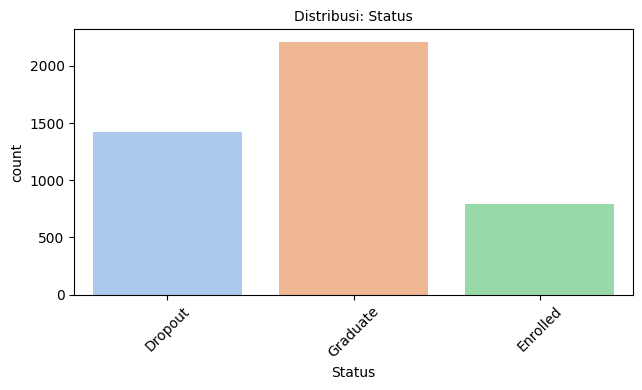

In [10]:
# Visualisasi distribusi fitur kategorikal
kategori = df.select_dtypes(include='object').columns.tolist()

n_cols = 3
n_rows = -(-len(kategori) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, kolom in enumerate(kategori):
    sns.countplot(x=kolom, data=df, ax=axes[idx], palette='pastel')
    axes[idx].set_title(f'Distribusi: {kolom}', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

# Menonaktifkan subplot kosong jika jumlah kolom tidak genap
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Penjelasan Output Distribusi Kategorikal:
1. Sebagian besar mahasiswa dalam dataset tercatat telah berhasil menyelesaikan studi dan meraih kelulusan.
2. Proporsi mahasiswa yang mengalami dropout cukup menonjol, memperkuat urgensi permasalahan ini untuk ditindaklanjuti melalui analisis prediktif.
3. Jumlah mahasiswa dengan status "Enrolled" (masih aktif) terlihat lebih sedikit, kemungkinan besar karena data dikumpulkan pada rentang waktu yang tidak mencakup mahasiswa baru secara menyeluruh.

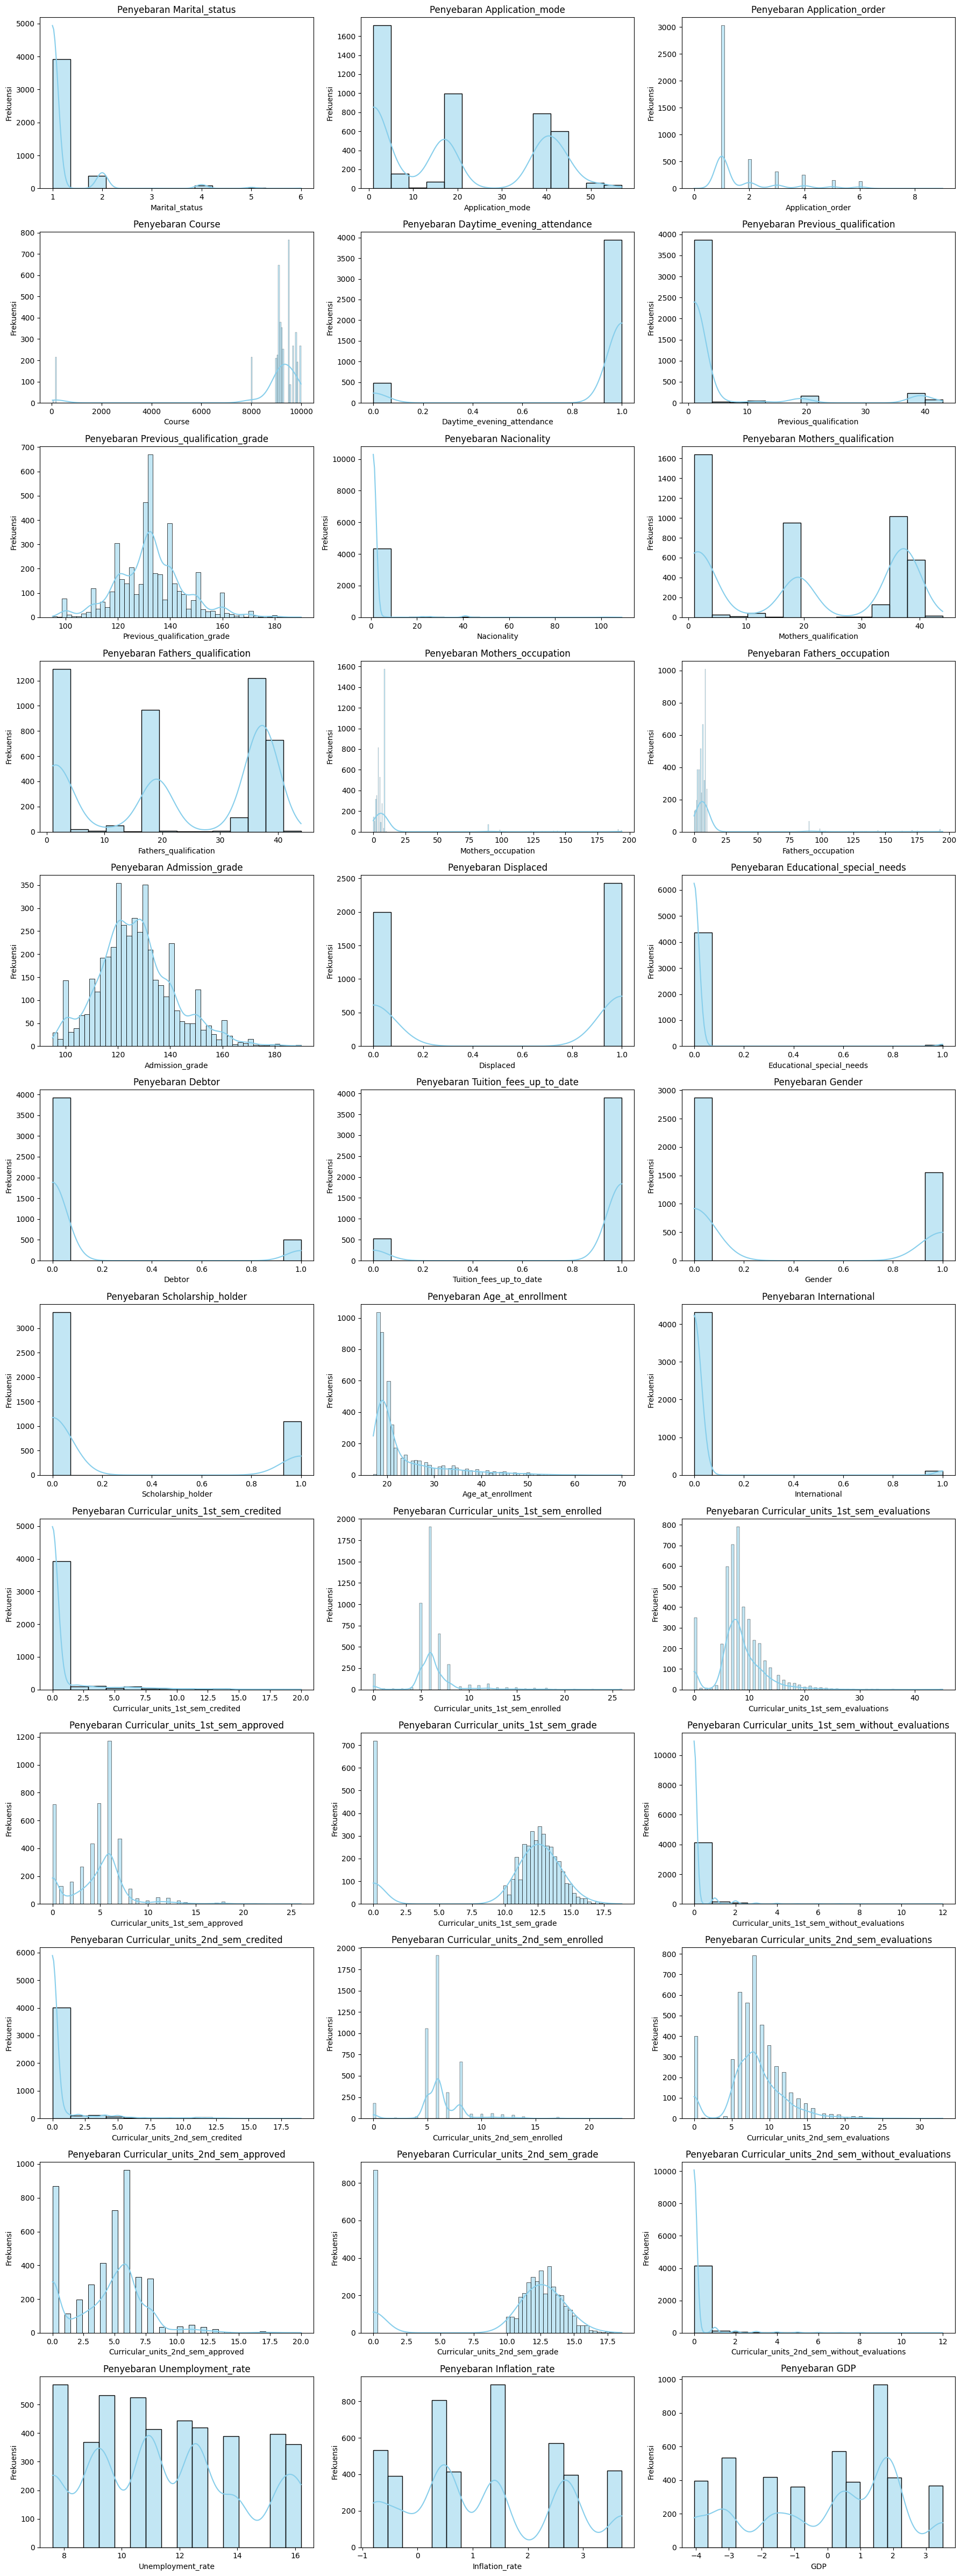

In [11]:
# Ambil kolom numerik
numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
baris = int(np.ceil(len(numerik) / 3))
kolom = 3

fig, axes = plt.subplots(baris, kolom, figsize=(18, baris * 4))
axes = axes.flatten()

for idx, fitur in enumerate(numerik):
    sns.histplot(df[fitur], kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Penyebaran {fitur}')
    axes[idx].set_xlabel(fitur)
    axes[idx].set_ylabel('Frekuensi')

# Menghilangkan subplot kosong jika ada
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Penjelasan Output Visualisasi Kolom Numerik:

Distribusi fitur numerik tidak menunjukkan pola yang sangat jelas atau mencolok. Hal ini kemungkinan besar karena banyak kolom sebenarnya merupakan data kategorikal yang sudah diubah ke format numerik (encoded), seperti pada fitur Marital_status, Application_mode, dan beberapa kolom lain yang serupa. Oleh sebab itu, visualisasi nilai mentah pada kolom-kolom ini kurang menggambarkan informasi yang bermakna tanpa proses decoding atau transformasi lebih lanjut, seperti one-hot encoding.

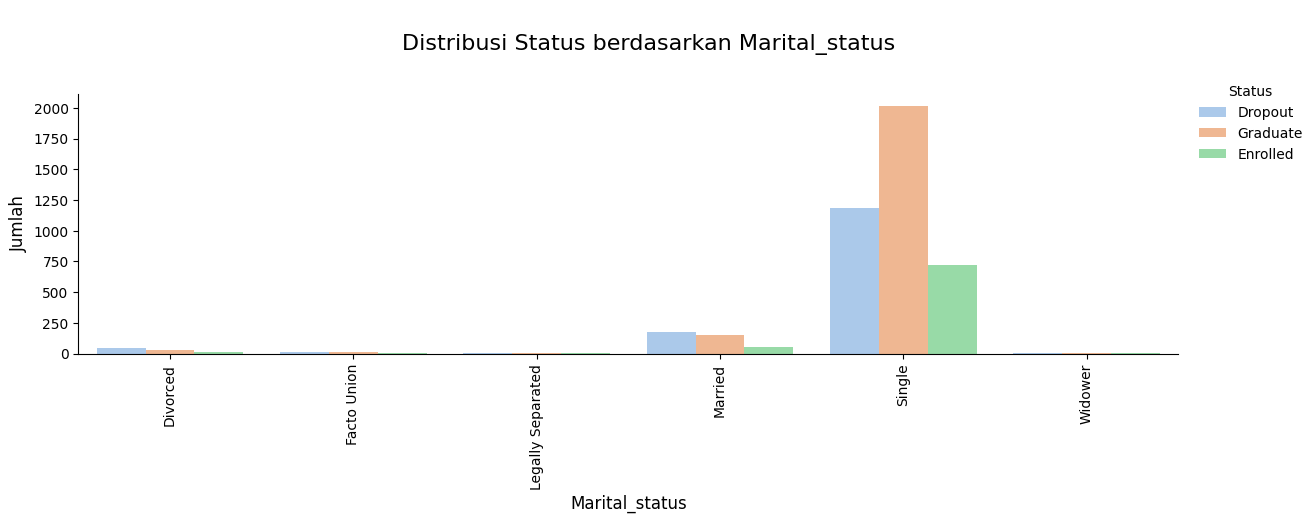

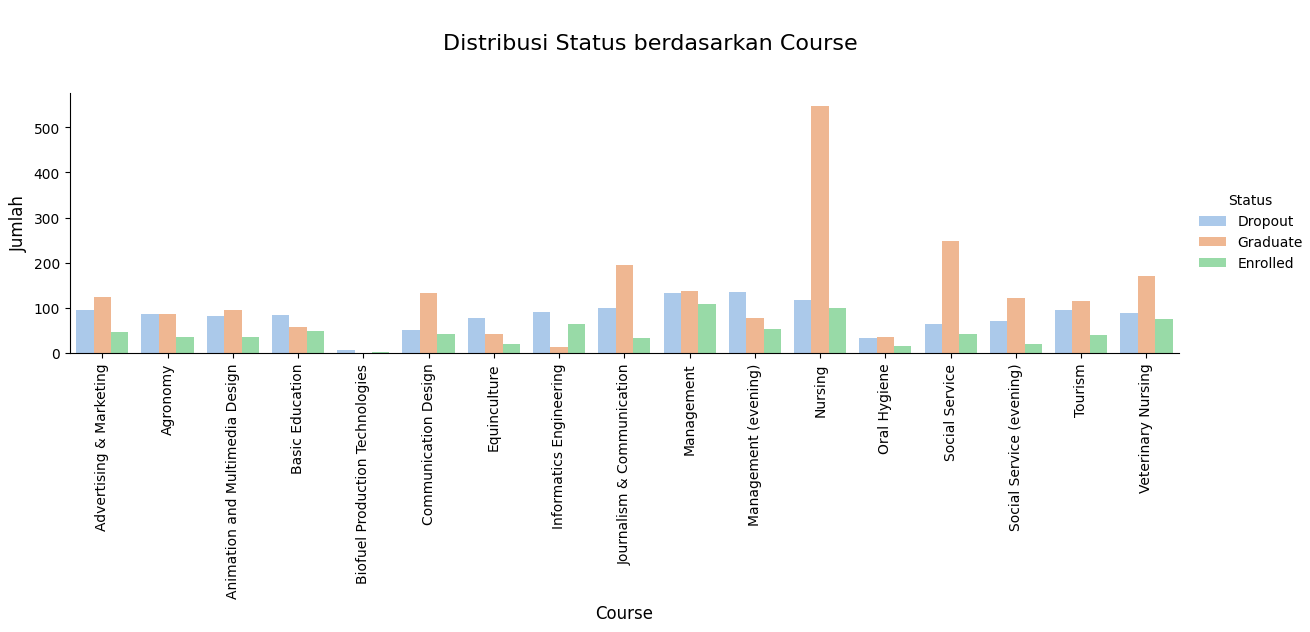

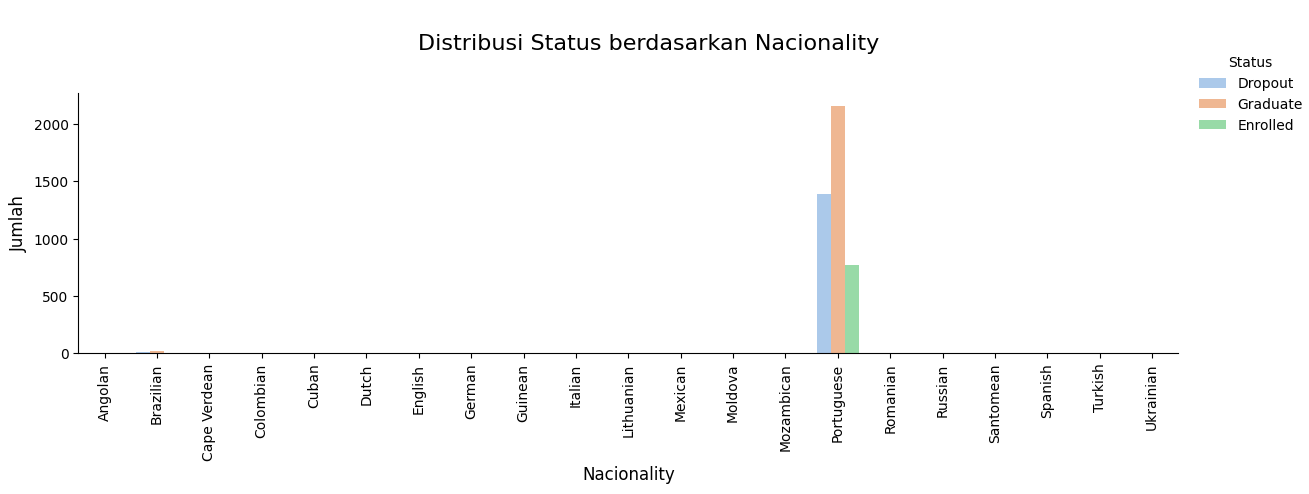

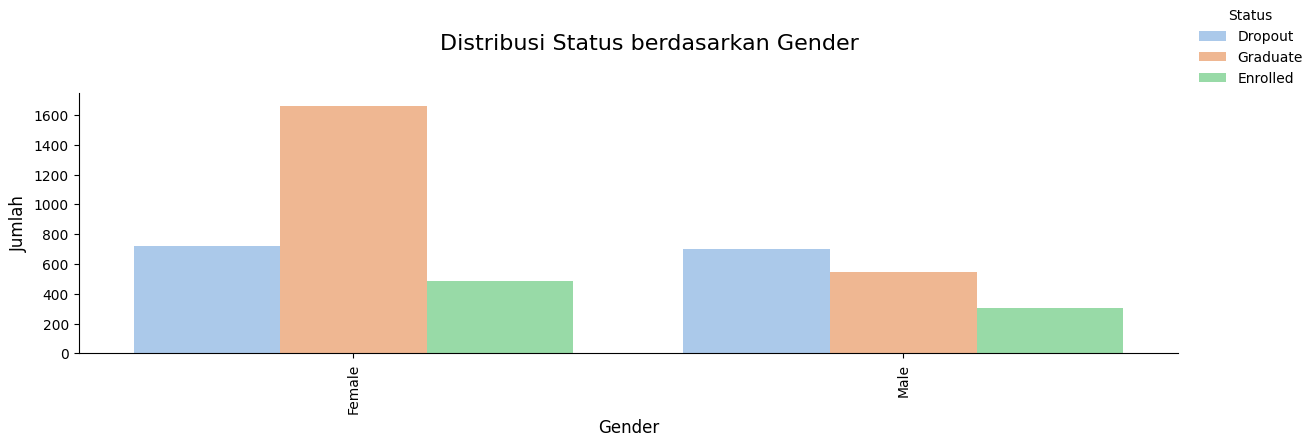

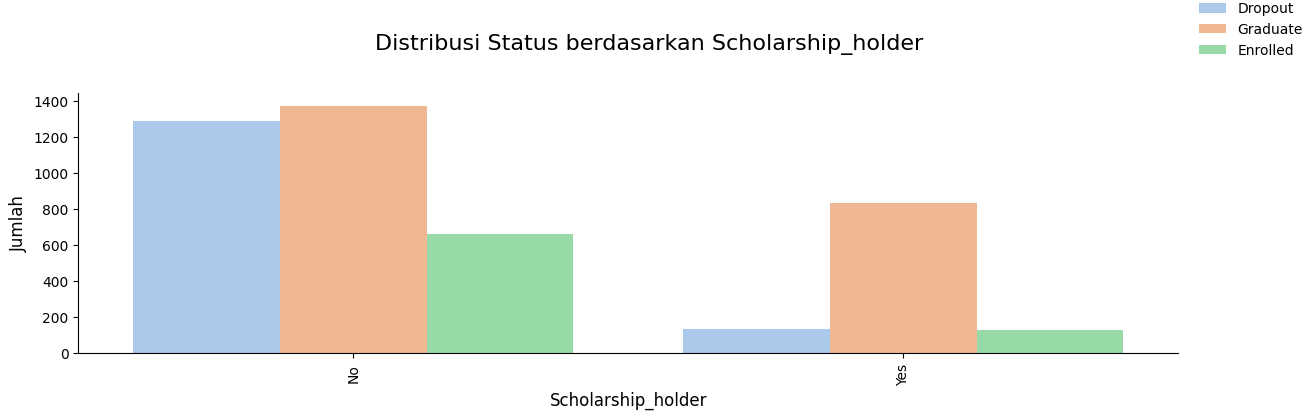

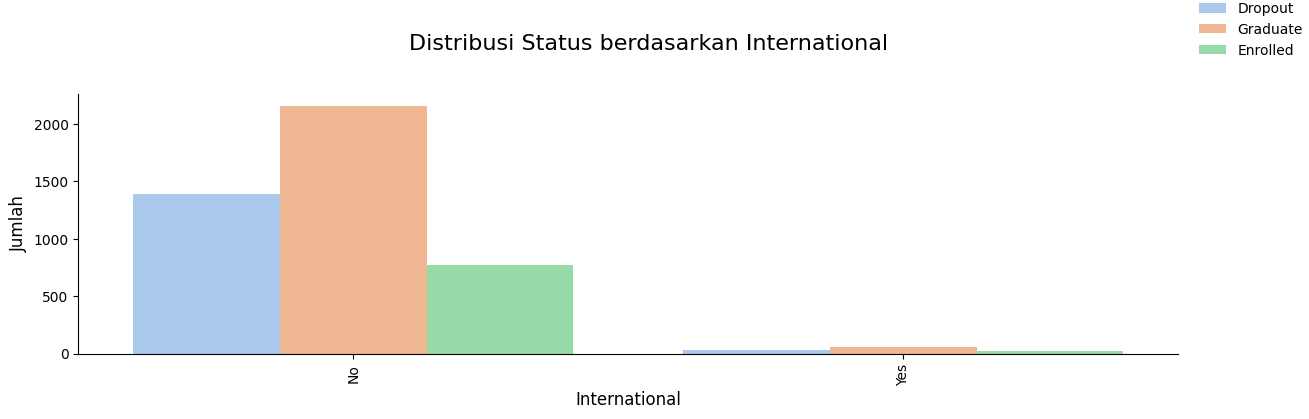

In [12]:
# Duplikasi dataframe agar data asli tetap aman
df_cat = df.copy()

# Kamus mapping nilai numerik ke label yang mudah dipahami
label_map = {
    'Gender': {1: 'Male', 0: 'Female'},
    'Scholarship_holder': {1: 'Yes', 0: 'No'},
    'International': {1: 'Yes', 0: 'No'},
    'Marital_status': {
        1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
        5: 'Facto Union', 6: 'Legally Separated'
    },
    'Course': {
        33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening)', 9003: 'Agronomy', 9070: 'Communication Design',
        9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130: 'Equinculture',
        9147: 'Management', 9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing',
        9556: 'Oral Hygiene', 9670: 'Advertising & Marketing', 9773: 'Journalism & Communication',
        9853: 'Basic Education', 9991: 'Management (evening)'
    },
    'Nacionality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English',
        17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
        26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova',
        101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
    },
}

# Menerapkan mapping label dan ubah tipe kolom menjadi kategori
for kolom, mapping in label_map.items():
    df_cat[kolom] = df_cat[kolom].replace(mapping).astype('category')

# Mapping kolom Status dengan label yang jelas
df_cat['Status'] = df_cat['Status'].replace({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'})

# Pilih semua kolom bertipe kategori
cat_features = df_cat.select_dtypes(include='category').columns.tolist()

# Visualisasi distribusi Status berdasarkan masing-masing fitur kategori
for fitur in cat_features:
    plot = sns.catplot(
        data=df_cat,
        x=fitur,
        hue='Status',
        kind='count',
        palette='pastel',
        height=4,
        aspect=3
    )
    plot.fig.suptitle(f"Distribusi Status berdasarkan {fitur}", y=1.05, fontsize=16)
    plot.set_xlabels(fitur, fontsize=12)
    plot.set_ylabels("Jumlah", fontsize=12)
    plot._legend.set_title("Status")
    plot._legend.set_bbox_to_anchor((1, 1))
    plot._legend.set_frame_on(False)
    plt.xticks(rotation=90)
    plt.subplots_adjust(top=0.9, bottom=0.25)
    plt.show()


Interpretasi hasil visualisasi:
- Beasiswa: Mahasiswa yang menerima beasiswa menunjukkan kecenderungan tingkat dropout yang lebih rendah serta proporsi lulusan yang lebih tinggi dibandingkan dengan mahasiswa yang tidak menerima beasiswa. Hal ini mengindikasikan bahwa beasiswa bisa menjadi faktor pendukung keberhasilan studi.
- Program Studi: Terdapat variasi yang cukup signifikan pada distribusi status mahasiswa antar program studi. Ini menunjukkan bahwa program studi yang diambil dapat memengaruhi risiko dropout maupun peluang kelulusan mahasiswa.
- Status Pernikahan: Mayoritas mahasiswa berstatus ‘Single’, namun mahasiswa yang berstatus ‘Married’ memiliki proporsi dropout yang relatif lebih tinggi. Faktor status pernikahan mungkin berkaitan dengan dinamika tanggung jawab yang memengaruhi kelanjutan studi.

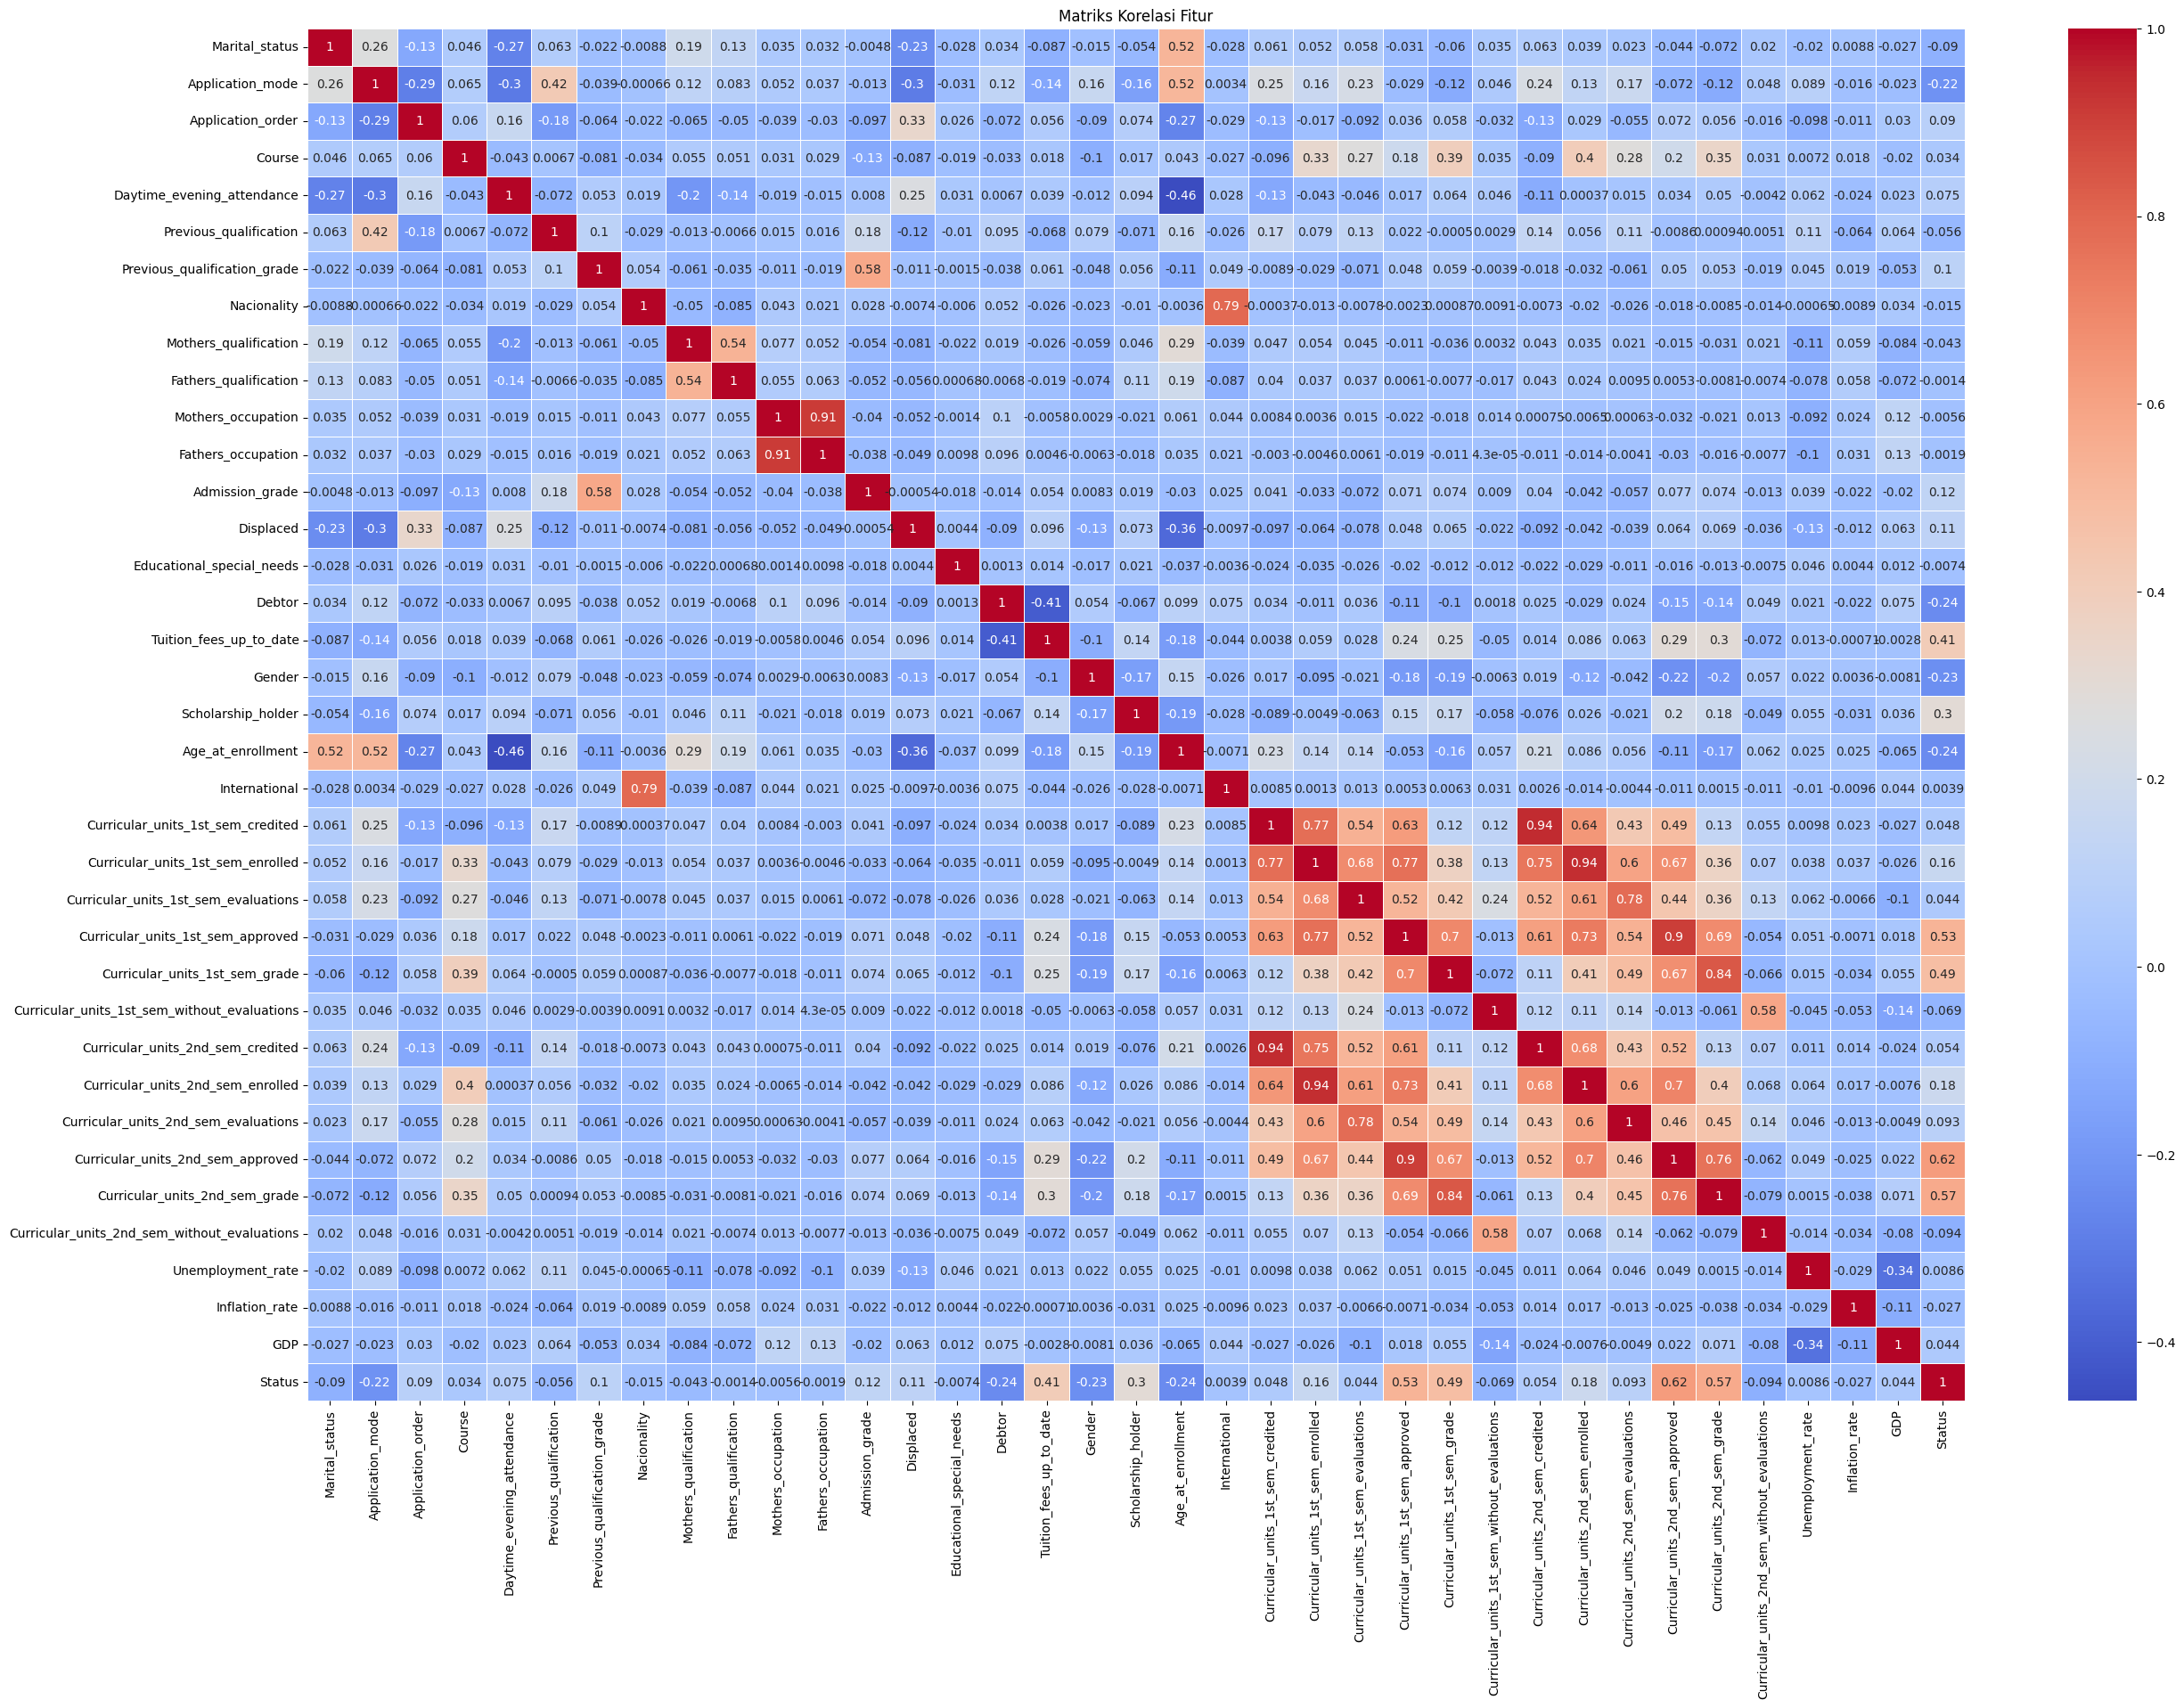

In [13]:
# Identifikasi kolom kategorikal dan numerik
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

# Salin dataframe dan lakukan encoding label untuk kolom kategorikal
df_enc = df.copy()
encoders = {}

for col in cat_cols:
    encoder = LabelEncoder()
    df_enc[col] = encoder.fit_transform(df_enc[col])
    encoders[col] = encoder

# Hitung matriks korelasi
corr_mat = df_enc.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(30, 20))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()


### Feature Engineering

In [15]:
# Encoding kolom kategorikal bertipe objek menjadi numerik
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

# Memisahkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']

# Membagi data menjadi train dan test untuk menghindari kebocoran data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan data train saja
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from imblearn.over_sampling import BorderlineSMOTE

# Sebelum SMOTE
print("\nDistribusi kelas sebelum SMOTE:")
print(pd.Series(y_train).value_counts())

# Terapkan Borderline-SMOTE
smote = BorderlineSMOTE(random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Setelah SMOTE
print("\nDistribusi kelas setelah Borderline-SMOTE:")
print(pd.Series(y_train_res).value_counts())


Distribusi kelas sebelum SMOTE:
Status
2    1791
0    1105
1     643
Name: count, dtype: int64

Distribusi kelas setelah Borderline-SMOTE:
Status
0    1791
1    1791
2    1791
Name: count, dtype: int64


## Modeling

In [32]:
# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Grid search parameter
param_grid = {
    'n_estimators': [100, 200, 300],        # jumlah pohon
    'max_depth': [None, 10, 20, 30],        # kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],        # minimal jumlah sampel untuk split
    'min_samples_leaf': [1, 2, 4],          # minimal jumlah sampel di daun
    'max_features': ['sqrt', 'log2']        # jumlah fitur yang dipertimbangkan di tiap split
}

# Grid Search CV (menggunakan data hasil SMOTE)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Melatih model menggunakan data yang sudah dioversampling
grid_search.fit(X_train_res, y_train_res)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Training Set:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy on Training Set: 0.8416154848315652


## Evaluation

In [37]:
# Ambil model terbaik hasil GridSearch
best_model = grid_search.best_estimator_

# Prediksi pada data uji yang *belum di-SMOTE*, tetapi sudah discale
y_pred = best_model.predict(X_test_scaled)

# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.768361581920904

Confusion Matrix:
 [[242  31  43]
 [ 30  69  52]
 [ 14  35 369]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.80       316
           1       0.51      0.46      0.48       151
           2       0.80      0.88      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.76      0.77      0.76       885



In [39]:
# Menampilkan fitur yang paling berpengaruh
importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nTop 10 fitur terpenting:")
print(feature_importance_df.head(10))


Top 10 fitur terpenting:
                                 Feature  Importance
30     Curricular_units_2nd_sem_approved    0.128094
24     Curricular_units_1st_sem_approved    0.089886
31        Curricular_units_2nd_sem_grade    0.075747
29  Curricular_units_2nd_sem_evaluations    0.051061
25        Curricular_units_1st_sem_grade    0.050950
23  Curricular_units_1st_sem_evaluations    0.043772
19                     Age_at_enrollment    0.041380
12                       Admission_grade    0.035952
6           Previous_qualification_grade    0.035089
16               Tuition_fees_up_to_date    0.033033


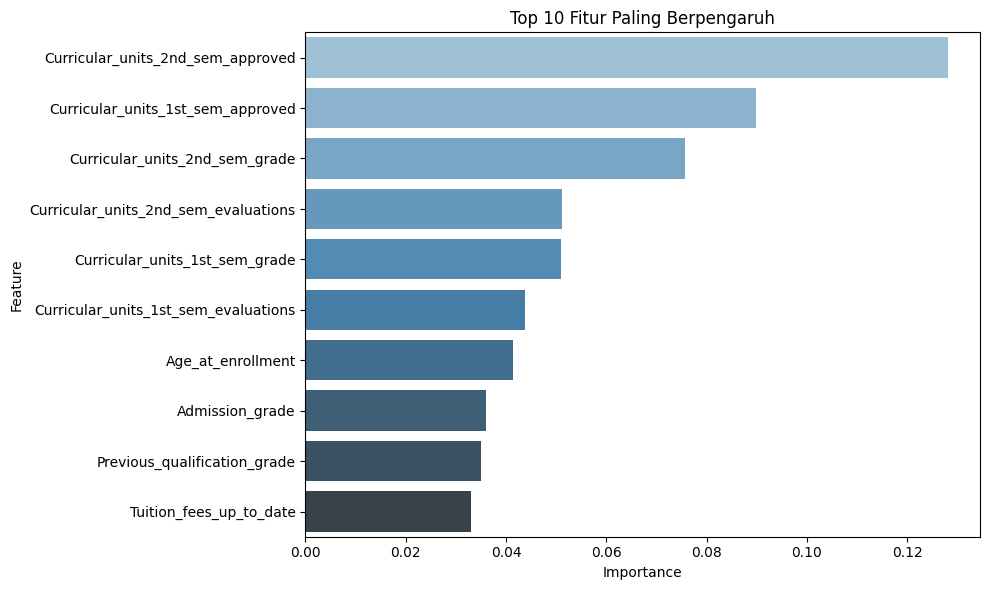

In [40]:
# Visualisasi Top 10 Fitur Paling Berpengaruh
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='Blues_d')
plt.title('Top 10 Fitur Paling Berpengaruh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [43]:
feature_importance_df.to_csv('feature_importance.csv', index=False)

## Lain-lain

In [42]:
import joblib

# Menyimpan model
joblib.dump(grid_search.best_estimator_, 'model_rf.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'scaler.pkl')

# Menyimpan label encoders
joblib.dump(label_enc, 'label_encoders.pkl')


['label_encoders.pkl']